In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import random as r
from sklearn.metrics import mean_squared_error

TODO

1.   Обработать выбросы
2.   Почистить датафрейм шоб использовать
3.   Цвета рандомные
4.   Нешкалированные штуковины =)
5.   get_dummies


In [ ]:
df = pd.read_csv('auto_ru_res_test-Copy1.csv')
df.drop(columns='url', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76089 entries, 0 to 76088
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   car_mark         76089 non-null  object
 1   Цена             76089 non-null  object
 2   Год              76089 non-null  int64 
 3   Пробег           76089 non-null  object
 4   Двигатель        76089 non-null  object
 5   Привод           76089 non-null  object
 6   Кузов            76089 non-null  object
 7   Цвет             76089 non-null  object
 8   Коробка передач  76089 non-null  object
 9   brand            76089 non-null  object
dtypes: int64(1), object(9)
memory usage: 5.8+ MB


In [ ]:
df.describe()

,Цена,Год,Пробег,Объем,Мощность,Кузов_внедорожник 3 дв.,Кузов_внедорожник 5 дв.,Кузов_внедорожник открытый,Кузов_кабриолет,Кузов_компактвэн,...,Цвет_коричневый,Цвет_красный,Цвет_оранжевый,Цвет_пурпурный,Цвет_розовый,Цвет_серебристый,Цвет_серый,Цвет_синий,Цвет_фиолетовый,Цвет_чёрный
count,7.554500e+04,75545.000000,75545.000000,75545.000000,75545.000000,75545.000000,75545.000000,75545.000000,75545.000000,75545.000000,...,75545.000000,75545.000000,75545.000000,75545.000000,75545.000000,75545.000000,75545.000000,75545.000000,75545.000000,75545.000000
mean,2.707514e+06,2014.318102,98142.848713,2.189249,176.762936,0.005560,0.454881,0.001125,0.003574,0.014468,...,0.034231,0.040876,0.005242,0.005957,0.000185,0.064875,0.352664,0.078324,0.005983,0.200066
std,4.234953e+06,8.064527,97388.276411,0.920731,92.675597,0.074356,0.497963,0.033525,0.059677,0.119411,...,0.181824,0.198005,0.072211,0.076950,0.013612,0.246307,0.477802,0.268683,0.077120,0.400052
min,2.000000e+04,1923.000000,0.000000,0.300000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.300000e+05,2010.000000,1629.000000,1.600000,117.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.563157e+06,2016.000000,80204.000000,2.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.967085e+06,2021.000000,159967.000000,2.500000,200.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.200000e+08,2022.000000,1000000.000000,8.300000,1000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.head(3)

,car_mark,Цена,Год,Пробег,Двигатель,Привод,Кузов,Цвет,Коробка передач,brand
0,Acura MDX III,2 450 000 ₽,2014,219 000 км,3.5 л / 290 л.с. / Бензин,полный,внедорожник 5 дв.,серый,автомат,Acura
1,Acura Integra III,1 000 000 ₽,1994,40 000 км,1.8 л / 170 л.с. / Бензин,передний,купе,жёлтый,механика,Acura
2,Acura RDX III,3 190 000 ₽,2019,7 000 км,2.0 л / 272 л.с. / Бензин,полный,внедорожник 5 дв.,серый,автомат,Acura


Начало препроцессинга

In [ ]:
s = df['Цена']
s = s.str.replace('₽', '')
s = s.str.replace('от ', '')
s = s.str.replace('\xa0', '')
s = s.astype(int)
df['Цена'] = s

In [ ]:
s = df['Пробег']
s = s.str.replace('км', '')
s = s.str.replace('\xa0', '')
s = s.str.replace('Новый', '0')
s = s.astype(int)
df['Пробег'] = s

In [ ]:
# У двигателя есть объем мощность и тип
s = df['Двигатель']
s = pd.DataFrame(s.str.split('/', expand=True).values, columns=['Объем', 'Мощность', 'Тип'])
s.loc[s['Объем'].str.find('л.с.') != -1 , 'Мощность'] = s.loc[s['Объем'].str.find('л.с.') != -1 ,'Объем']
s.loc[s['Тип'].str.find('Электро') != -1 , 'Объем'] = 0

s['Объем'] = s['Объем'].str.replace(' л\u2009','').str.replace('\xa0','').str.replace('л.с.\u2009','')

s['Мощность'] = s['Мощность'].str.replace('\u2009','').str.replace('\xa0','').str.replace('л.с.','').str.replace('кВт','')

s['Тип'] = s['Тип'].str.replace('\u2009','')

df[s.columns] = s.values
df['Мощность'] = df['Мощность'].astype(int)
df['Объем'] = df['Объем'].astype(float)
df = df.fillna(0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# Удаление лишних цветов
colors = ['серый', 'жёлтый', 'чёрный', 'белый', 'красный', 'фиолетовый',
          'бежевый', 'пурпурный', 'коричневый', 'синий', 'серебристый',
          'голубой', 'зелёный', 'оранжевый', 'розовый']
for i in range(df.shape[0]):
  if not df['Цвет'][i] in colors:  #  Проверка на русский текст.
    df.loc[i,'Цвет'] = np.NaN

# Добавление цветов поверх лишних
print(df['Цвет'].isnull().sum())
df['Цвет'] = df['Цвет'].fillna(colors[r.randint(0, len(colors))])

18182


In [ ]:
print(df['Цвет'].value_counts(),
      df['Цвет'].isnull().sum())

серый          26816
чёрный         15219
белый          11643
синий           5968
серебристый     4922
красный         3120
коричневый      2586
зелёный         1971
бежевый         1087
голубой          736
жёлтый           702
фиолетовый       454
пурпурный        454
оранжевый        396
розовый           15
Name: Цвет, dtype: int64 0


In [ ]:
# Кузов Предобработка. Удалить строчки меньше 20
#print(df['Кузов'].value_counts())
Kuz = ['фастбек', 'лимузин', 'пикап полуторная кабина', 'хэтчбек 4 дв.', 'спидстер', 'седан-хардтоп', 'фаэтон']

for i in range(df.shape[0]):
  if df['Кузов'][i] in Kuz:  #  Проверка на русский текст.
    df.drop(i, inplace=True)

In [ ]:
# Кузов OneHotEncodin
df.drop(df[df['Тип'] == 'Электро'].index, inplace=True)
df_kuz = df['Кузов']
df = df.join(pd.get_dummies(df[['Кузов','Коробка передач', 'brand', 'Тип', 'Привод', 'Цвет']]))


In [ ]:
 
df.drop(columns=['Кузов','Коробка передач', 'brand', 'Тип', 'Привод', 'Цвет','Двигатель', 'car_mark'], inplace=True)
df.head(3)


,Цена,Год,Пробег,Объем,Мощность,Кузов_внедорожник 3 дв.,Кузов_внедорожник 5 дв.,Кузов_внедорожник открытый,Кузов_кабриолет,Кузов_компактвэн,...,Цвет_коричневый,Цвет_красный,Цвет_оранжевый,Цвет_пурпурный,Цвет_розовый,Цвет_серебристый,Цвет_серый,Цвет_синий,Цвет_фиолетовый,Цвет_чёрный
0,2450000,2014,219000,3.5,290,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1000000,1994,40000,1.8,170,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3190000,2019,7000,2.0,272,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


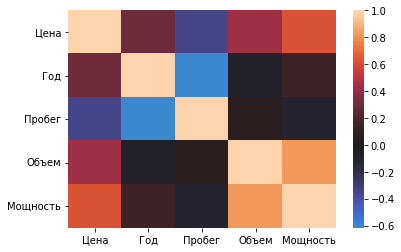

In [ ]:
from sklearn.model_selection import train_test_split
y = df['Цена']
X = df.drop(columns=['Цена'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)
y_pred = reg.predict(X_test)
print(mean_squared_error(y_test, y_pred)**0.5)

2562377.551244084


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
TreeReg = DecisionTreeRegressor(random_state=42)
print(cross_val_score(TreeReg, X_train, y_train, cv=5))
TreeReg.fit(X_train, y_train)

y_pred = TreeReg.predict(X_test)
print(mean_squared_error(y_test, y_pred)**0.5)

[0.8374368  0.8740424  0.90269578 0.8897776  0.91093842]
1197745.4505353093


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'min_samples_split' : range(1, 10),
          'min_samples_leaf' : range(1,8)}
tree = DecisionTreeRegressor(random_state=42)
GSCV = GridSearchCV(tree, params, verbose=0)
GSCV.fit(X_train, y_train)
y_pred = GSCV.predict(X_test)
print(mean_squared_error(y_test, y_pred)**0.5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 315.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a float

1249429.8030266324
